     time   200   150   100    60    50    40   25   10    5
0       5    52    51    46    48    52    46   50   52   48
1       6    58    52    46    45    44    45   46   42   44
2       7    53    49    49    45    52    46   48   47   43
3       8    66    51    49    49    49    51   46   46   52
4       9    74    54    51    54    49    41   43   40   47
..    ...   ...   ...   ...   ...   ...   ...  ...  ...  ...
995  1000  4523  3459  2476  1703  1296   954  709  483  288
996  1001  4544  3366  2433  1717  1263   998  685  472  267
997  1002  4465  3448  2416  1716  1277   962  720  486  279
998  1003  4499  3434  2410  1673  1309  1023  716  491  285
999  1004  4560  3412  2527  1706  1266   972  709  470  285

[1000 rows x 10 columns]
10
10
5
[505, 505]
[5.8, 4.3]


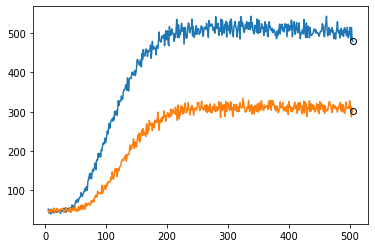

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

whichday='5'

#construct=['D262N']
construct=['D262V']
#construct=['WT']

df=pd.read_table('/project/fava/work/kiersten.ruff/Collaborations/Mittag/2023/ThT_fitting/For_Kiersten/Revised_Eq_Data/Datasets for fitting/Day '+whichday+'/'+construct[0]+'_data.txt')

print(df)

stconcs=list(df.columns.values)
print(len(stconcs))

maxtimebyconc=[]
maxslopebyconc=[]
for i in range(8,10):#1,len(stconcs)):
    print(stconcs[i])
    currthtall=df[stconcs[i]].tolist()
    currtimeall=df['time'].tolist()
    currtime=currtimeall[0:501]
    currtht=currthtall[0:501]
    binsz=10
    getslope=[]
    for j in range(0,len(currtht)-binsz):
        getslope.append((currtht[j+binsz]-currtht[j])/(currtime[j+binsz]-currtime[j]))
    pos = [i for i,x in enumerate(getslope) if x<-20]
    maxslopebyconc.append(max(getslope))
    
    plt.plot(currtime,currtht)
    if pos:
        maxtimebyconc.append(currtime[pos[0]])
        plt.plot(currtime[pos[0]],currtht[pos[0]],'o',color='black',fillstyle='none')

    else:
        maxtimebyconc.append(currtime[j+binsz])
        plt.plot(currtime[j+binsz],currtht[j+binsz],'o',color='black',fillstyle='none')
    
    #print(stconcs[i])
    #print(getslope)
    
print(maxtimebyconc)
print(maxslopebyconc)

13
128
13
128
13
128
13
128
10
100


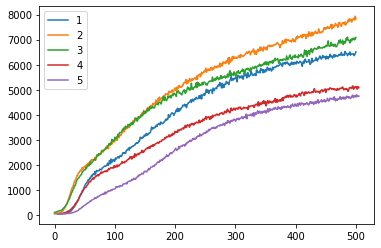

In [18]:
whichday=['1','2','3','4','5']
#whichday=['2','3']
#whichday=['1','4']

#construct=['D262N']
#construct=['D262V']
construct=['WT']

for d in range(0,len(whichday)):
    df=pd.read_table('/project/fava/work/kiersten.ruff/Collaborations/Mittag/2023/ThT_fitting/For_Kiersten/Revised_Eq_Data/Datasets for fitting/Day '+whichday[d]+'/'+construct[0]+'_data.txt')

    #print(df)

    stconcs=list(df.columns.values)
    print(len(stconcs))

    maxtimebyconc=[]
    maxslopebyconc=[]
    for i in range(3,4):#1,len(stconcs)):
        print(stconcs[i])
        currthtall=df[stconcs[i]].tolist()
        currtimeall=df['time'].tolist()
        currtime=currtimeall[0:501]
        currtht=currthtall[0:501]

        plt.plot(currtime,currtht)
        
#plt.xlim([0,100])
#plt.ylim([0,500])
plt.legend(whichday)

# Current Concentrations Examining

In [23]:
conc=[17.179869184, 21.47483648, 26.8435456, 33.554432, 41.9430, 52.4288, 65.536, 81.92, 102.4, 128, 160, 200]
conc2=[17, 21, 26, 33, 41, 52, 65, 81, 102, 128, 160, 200]

mydays=['1','4']
#mydays=['1','2','4']
#mydays=['1','2','3']
mymarkers=['d','s','o']

# Paramater by Conc - WT

[-2.0511581900652964, -1.729230095177934, -1.407302000290572, -1.0853739054032097, -0.7634471863777104, -0.44151771562848474, -0.1195896207411224, 0.20233847414623973, 0.5242665690336021, 0.8461946639209645, 1.1681227588083267, 1.4900508536956891]
[[2.37903530e-08 1.91278290e-08 3.27120838e-08 2.36664082e-08
  2.17073282e-09 5.53556334e-10 5.62108206e-10 2.64429658e-09
  2.15734008e-07 2.96714064e-07 2.89508788e-05 4.63543111e-06]
 [1.48145314e-08 5.62593635e-09 4.67270959e-09 8.77324310e-10
  3.99420381e-10 3.99611185e-10 6.34856765e-11 9.62613986e-13
  3.42297069e-08 4.31934893e-08 6.43594514e-09 6.96444114e-09]]
[1.930244217970421e-08, 1.2376882681263325e-08, 1.8692396719136074e-08, 1.227186624357155e-08, 1.285076600693804e-09, 4.765837591323417e-10, 3.1279694105644867e-10, 1.3226295988534953e-09, 1.249818574041943e-07, 1.6995377665788059e-07, 1.4478657373408933e-05, 2.3211977743490873e-06]
[4.487910775975926e-09, 6.750946336174787e-09, 1.4019687130514112e-08, 1.1394541933435125e-08

<ErrorbarContainer object of 3 artists>

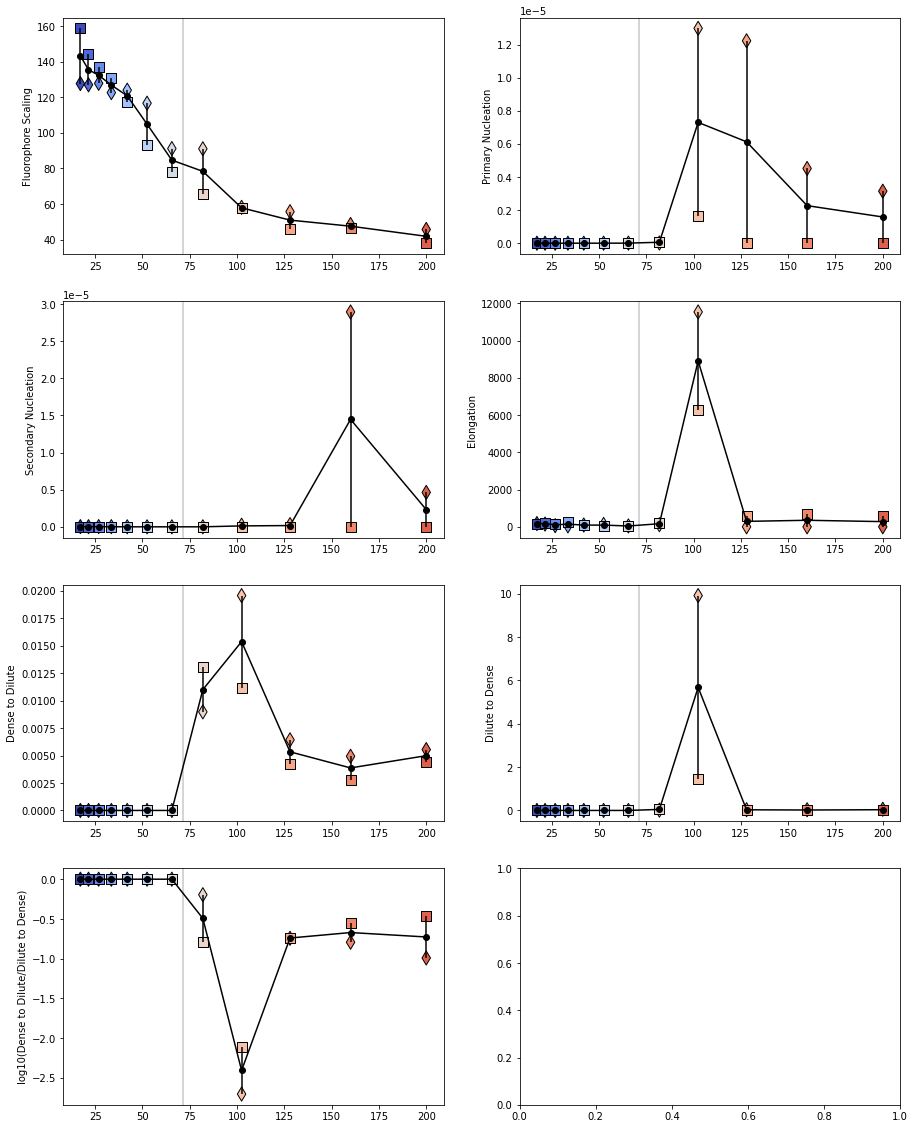

In [24]:
import math
import numpy as np
from scipy import stats

csat_wt = 71.2

supersatwt=[]
for c in range(0,len(conc)):
    supersatwt.append(math.log2(conc[c]/csat_wt))
    
print(supersatwt)

dendilwt=np.zeros((len(mydays),len(conc)))
dildenwt=np.zeros((len(mydays),len(conc)))
fib1wt=np.zeros((len(mydays),len(conc)))
fib2wt=np.zeros((len(mydays),len(conc)))
fiblongwt=np.zeros((len(mydays),len(conc)))
fscalwt=np.zeros((len(mydays),len(conc)))
ddratwt=np.zeros((len(mydays),len(conc)))

mdendilwt=[]
mdildenwt=[]
mfib1wt=[]
mfib2wt=[]
mfiblongwt=[]
mfscalwt=[]
mddratwt=[]

semdendilwt=[]
semdildenwt=[]
semfib1wt=[]
semfib2wt=[]
semfiblongwt=[]
semfscalwt=[]
semddratwt=[]

for c in range(0,len(conc2)):
    for d in range(0,len(mydays)):
        with open('best_guess_WT_'+str(conc2[c])+'_Day_'+mydays[d]+'.txt') as myfile:
            for line in myfile:
                line = line.strip()
                line = line.split(",")
                dendilwt[d,c]=(float(line[0]))
                dildenwt[d,c]=(float(line[1]))
                fib1wt[d,c]=(float(line[2]))
                fib2wt[d,c]=(float(line[3]))
                fiblongwt[d,c]=(float(line[4]))
                fscalwt[d,c]=(float(line[10]))
                if dildenwt[d,c]!=0:
                    ddratwt[d,c]=(math.log10(dendilwt[d,c]/dildenwt[d,c]))
                else:
                    ddratwt[d,c]=(math.log10(1))
    
    # Mean values
    mdendilwt.append(np.mean(dendilwt[:,c]))
    mdildenwt.append(np.mean(dildenwt[:,c]))
    mfib1wt.append(np.mean(fib1wt[:,c]))
    mfib2wt.append(np.mean(fib2wt[:,c]))
    mfiblongwt.append(np.mean(fiblongwt[:,c]))
    mfscalwt.append(np.mean(fscalwt[:,c]))
    mddratwt.append(np.mean(ddratwt[:,c]))
    
    # SEM values
    semdendilwt.append(stats.sem(dendilwt[:,c]))
    semdildenwt.append(stats.sem(dildenwt[:,c]))
    semfib1wt.append(stats.sem(fib1wt[:,c]))
    semfib2wt.append(stats.sem(fib2wt[:,c]))
    semfiblongwt.append(stats.sem(fiblongwt[:,c]))
    semfscalwt.append(stats.sem(fscalwt[:,c]))
    semddratwt.append(stats.sem(ddratwt[:,c]))

print(fib2wt)
print(mfib2wt)
print(semfib2wt)
print(np.array(mfib2wt)-np.array(semfib2wt))

msize=100
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

for d in range(0,len(mydays)):
    #axs[0,0].plot(conc,fscalwt,'o',markersize=msize)
    axs[0,0].scatter(conc, fscalwt[d,:], s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[0,0].axvline(x=csat_wt,color='lightgrey')
    axs[0,0].set_ylabel('Fluorophore Scaling')

    #axs[0,1].plot(conc,fib1wt,'o',markersize=msize)
    axs[0,1].scatter(conc, fib1wt[d,:], s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[0,1].axvline(x=csat_wt,color='lightgrey')
    axs[0,1].set_ylabel('Primary Nucleation')

    #axs[1,0].plot(conc,fib2wt,'o',markersize=msize)
    axs[1,0].scatter(conc, fib2wt[d,:], s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[1,0].axvline(x=csat_wt,color='lightgrey')
    axs[1,0].set_ylabel('Secondary Nucleation')

    #axs[1,1].plot(conc,fiblongwt,'o',markersize=msize)
    axs[1,1].scatter(conc, fiblongwt[d,:], s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[1,1].axvline(x=csat_wt,color='lightgrey')
    axs[1,1].set_ylabel('Elongation')

    #axs[2,0].plot(conc,dendilwt,'o',markersize=msize)
    axs[2,0].scatter(conc, dendilwt[d,:], s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[2,0].axvline(x=csat_wt,color='lightgrey')
    axs[2,0].set_ylabel('Dense to Dilute')

    #axs[2,1].plot(conc,dildenwt,'o',markersize=msize)
    axs[2,1].scatter(conc, dildenwt[d,:], s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[2,1].axvline(x=csat_wt,color='lightgrey')
    axs[2,1].set_ylabel('Dilute to Dense')

    #axs[3,0].plot(conc,ddratwt,'o',markersize=msize)
    axs[3,0].scatter(conc, ddratwt[d,:], s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[3,0].axvline(x=csat_wt,color='lightgrey')
    axs[3,0].set_ylabel('log10(Dense to Dilute/Dilute to Dense)')

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

axs[0,0].errorbar(conc,mfscalwt,semfscalwt,marker='o',color='k')
axs[0,1].errorbar(conc,mfib1wt,semfib1wt,marker='o',color='k')
axs[1,0].errorbar(conc,mfib2wt,semfib2wt,marker='o',color='k')
axs[1,1].errorbar(conc,mfiblongwt,semfiblongwt,marker='o',color='k')
axs[2,0].errorbar(conc,mdendilwt,semdendilwt,marker='o',color='k')
axs[2,1].errorbar(conc,mdildenwt,semdildenwt,marker='o',color='k')
axs[3,0].errorbar(conc,mddratwt,semddratwt,marker='o',color='k')

#plt.savefig('WT_Day_2_fitted_parameters_500_max_text_files.pdf', transparent=True, bbox_inches = "tight") 


# Parameter by Concentration D262V

[-2.7478522677443813, -2.425924172857019, -2.103996077969657, -1.7820679830822943, -1.460141264056795, -1.1382117933075695, -0.8162836984202073, -0.4943556035328448, -0.17242750864548256, 0.14950058624187984, 0.4714286811292421, 0.7933567760166044]
[[1.64043903e-08 1.35869261e-08 6.77029898e-09 5.20049127e-09
  1.08856749e-08 1.23474465e-08 7.34086988e-09 1.42776781e-08
  2.07865013e-08 7.41733024e-08 2.43277139e-08 1.77172521e-08]
 [7.92366915e-09 9.49027720e-09 3.96997493e-09 4.58029200e-09
  4.88411976e-09 3.62880100e-09 3.44268167e-09 1.82213671e-09
  1.82189112e-09 2.31236694e-09 1.11370199e-09 2.24656412e-10]]
[1.2164029703300831e-08, 1.153860165620937e-08, 5.370136957464092e-09, 4.890391633731034e-09, 7.884897317961484e-09, 7.988123747638938e-09, 5.391775773653342e-09, 8.049907396898827e-09, 1.1304196190451296e-08, 3.8242834678139945e-08, 1.2720707956475106e-08, 8.970954274127776e-09]
[4.240360558155918e-09, 2.0483244540243987e-09, 1.4001620236683768e-09, 3.100996379348547e-10, 

<ErrorbarContainer object of 3 artists>

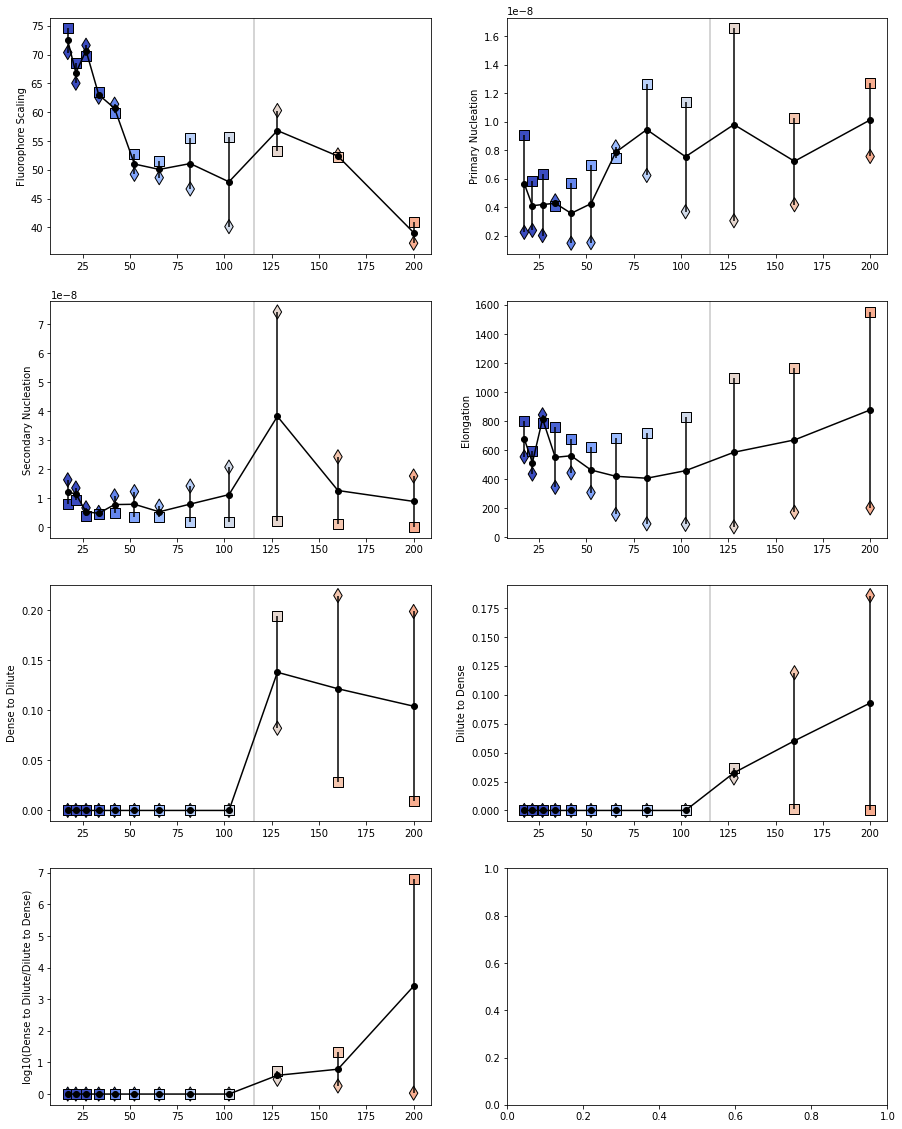

In [25]:
import math

csat_d262v = 115.4

supersatd262v=[]
for c in range(0,len(conc)):
    supersatd262v.append(math.log2(conc[c]/csat_d262v))
    
print(supersatd262v)


dendild262v=np.zeros((len(mydays),len(conc)))
dildend262v=np.zeros((len(mydays),len(conc)))
fib1d262v=np.zeros((len(mydays),len(conc)))
fib2d262v=np.zeros((len(mydays),len(conc)))
fiblongd262v=np.zeros((len(mydays),len(conc)))
fscald262v=np.zeros((len(mydays),len(conc)))
ddratd262v=np.zeros((len(mydays),len(conc)))

mdendild262v=[]
mdildend262v=[]
mfib1d262v=[]
mfib2d262v=[]
mfiblongd262v=[]
mfscald262v=[]
mddratd262v=[]

semdendild262v=[]
semdildend262v=[]
semfib1d262v=[]
semfib2d262v=[]
semfiblongd262v=[]
semfscald262v=[]
semddratd262v=[]


for c in range(0,len(conc2)):
    for d in range(0,len(mydays)):
        with open('best_guess_D262V_'+str(conc2[c])+'_Day_'+mydays[d]+'.txt') as myfile:
            for line in myfile:
                line = line.strip()
                line = line.split(",")
                dendild262v[d,c]=(float(line[0]))
                dildend262v[d,c]=(float(line[1]))
                fib1d262v[d,c]=(float(line[2]))
                fib2d262v[d,c]=(float(line[3]))
                fiblongd262v[d,c]=(float(line[4]))
                fscald262v[d,c]=(float(line[10]))
                if dildend262v[d,c]!=0:
                    ddratd262v[d,c]=(math.log10(dendild262v[d,c]/dildend262v[d,c]))
                else:
                    ddratd262v[d,c]=(math.log10(1))
    
    # Mean values
    mdendild262v.append(np.mean(dendild262v[:,c]))
    mdildend262v.append(np.mean(dildend262v[:,c]))
    mfib1d262v.append(np.mean(fib1d262v[:,c]))
    mfib2d262v.append(np.mean(fib2d262v[:,c]))
    mfiblongd262v.append(np.mean(fiblongd262v[:,c]))
    mfscald262v.append(np.mean(fscald262v[:,c]))
    mddratd262v.append(np.mean(ddratd262v[:,c]))
    
    # SEM values
    semdendild262v.append(stats.sem(dendild262v[:,c]))
    semdildend262v.append(stats.sem(dildend262v[:,c]))
    semfib1d262v.append(stats.sem(fib1d262v[:,c]))
    semfib2d262v.append(stats.sem(fib2d262v[:,c]))
    semfiblongd262v.append(stats.sem(fiblongd262v[:,c]))
    semfscald262v.append(stats.sem(fscald262v[:,c]))
    semddratd262v.append(stats.sem(ddratd262v[:,c]))

print(fib2d262v)
print(mfib2d262v)
print(semfib2d262v)
print(np.array(mfib2d262v)-np.array(semfib2d262v))
print(dendild262v)
print(dildend262v)


msize=100
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
for d in range(0,len(mydays)):
    #axs[0,0].plot(conc,fscald262v,'o',markersize=msize)
    axs[0,0].scatter(conc, fscald262v[d,:], s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[0,0].axvline(x=csat_d262v,color='lightgrey')
    axs[0,0].set_ylabel('Fluorophore Scaling')

    #axs[0,1].plot(conc,fib1d262v,'o',markersize=msize)
    axs[0,1].scatter(conc, fib1d262v[d,:], s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[0,1].axvline(x=csat_d262v,color='lightgrey')
    axs[0,1].set_ylabel('Primary Nucleation')

    #axs[1,0].plot(conc,fib2d262v,'o',markersize=msize)
    axs[1,0].scatter(conc, fib2d262v[d,:], s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[1,0].axvline(x=csat_d262v,color='lightgrey')
    axs[1,0].set_ylabel('Secondary Nucleation')

    #axs[1,1].plot(conc,fiblongd262v,'o',markersize=msize)
    axs[1,1].scatter(conc, fiblongd262v[d,:], s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[1,1].axvline(x=csat_d262v,color='lightgrey')
    axs[1,1].set_ylabel('Elongation')

    #axs[2,0].plot(conc,dendild262v,'o',markersize=msize)
    axs[2,0].scatter(conc, dendild262v[d,:], s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[2,0].axvline(x=csat_d262v,color='lightgrey')
    axs[2,0].set_ylabel('Dense to Dilute')

    #axs[2,1].plot(conc,dildend262v,'o',markersize=msize)
    axs[2,1].scatter(conc, dildend262v[d,:], s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[2,1].axvline(x=csat_d262v,color='lightgrey')
    axs[2,1].set_ylabel('Dilute to Dense')

    #axs[3,0].plot(conc,ddratd262v,'o',markersize=msize)
    axs[3,0].scatter(conc, ddratd262v[d,:], s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[3,0].axvline(x=csat_d262v,color='lightgrey')
    axs[3,0].set_ylabel('log10(Dense to Dilute/Dilute to Dense)')

axs[0,0].errorbar(conc,mfscald262v,semfscald262v,marker='o',color='k')
axs[0,1].errorbar(conc,mfib1d262v,semfib1d262v,marker='o',color='k')
axs[1,0].errorbar(conc,mfib2d262v,semfib2d262v,marker='o',color='k')
axs[1,1].errorbar(conc,mfiblongd262v,semfiblongd262v,marker='o',color='k')
axs[2,0].errorbar(conc,mdendild262v,semdendild262v,marker='o',color='k')
axs[2,1].errorbar(conc,mdildend262v,semdildend262v,marker='o',color='k')
axs[3,0].errorbar(conc,mddratd262v,semddratd262v,marker='o',color='k')

#plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
#plt.rcParams['ps.fonttype'] = 42
#plt.rcParams['font.sans-serif'] = "Arial"
#plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('D262V_Day_2_fitted_parameters_500_max.pdf', transparent=True, bbox_inches = "tight") 


# Parameter by Concentration D262N

[-2.8185987425718495, -2.4966706476844873, -2.174742552797125, -1.852814457909763, -1.5308877388842634, -1.208958268135038, -0.8870301732476757, -0.5651020783603132, -0.24317398347295088, 0.0787541114144113, 0.4006822063017738, 0.722610301189136]
[[2.28945597e-08 3.55164645e-08 4.61503781e-08 2.85300715e-08
  3.50934186e-08 5.06205945e-08 6.38168135e-08 2.43067007e-08
  3.03202756e-08 7.51942005e-09 1.94098229e-08 4.41445435e-09]
 [1.01318363e-08 1.07725336e-08 1.75913927e-08 3.99713611e-09
  4.15362980e-09 4.80074328e-09 5.12260473e-09 2.20286888e-09
  3.15204911e-09 1.93102964e-08 1.19884871e-08 1.75562835e-09]]
[1.651319800191487e-08, 2.3144499072549896e-08, 3.187088542851538e-08, 1.6263603825430955e-08, 1.9623524213252798e-08, 2.7710668885710605e-08, 3.446970910111166e-08, 1.3254784795272358e-08, 1.6736162356251076e-08, 1.3414858232766694e-08, 1.569915499293846e-08, 3.08504134992434e-09]
[6.381361719158417e-09, 1.2371965436680608e-08, 1.427949271511324e-08, 1.2266467715396944e-08, 

<ErrorbarContainer object of 3 artists>

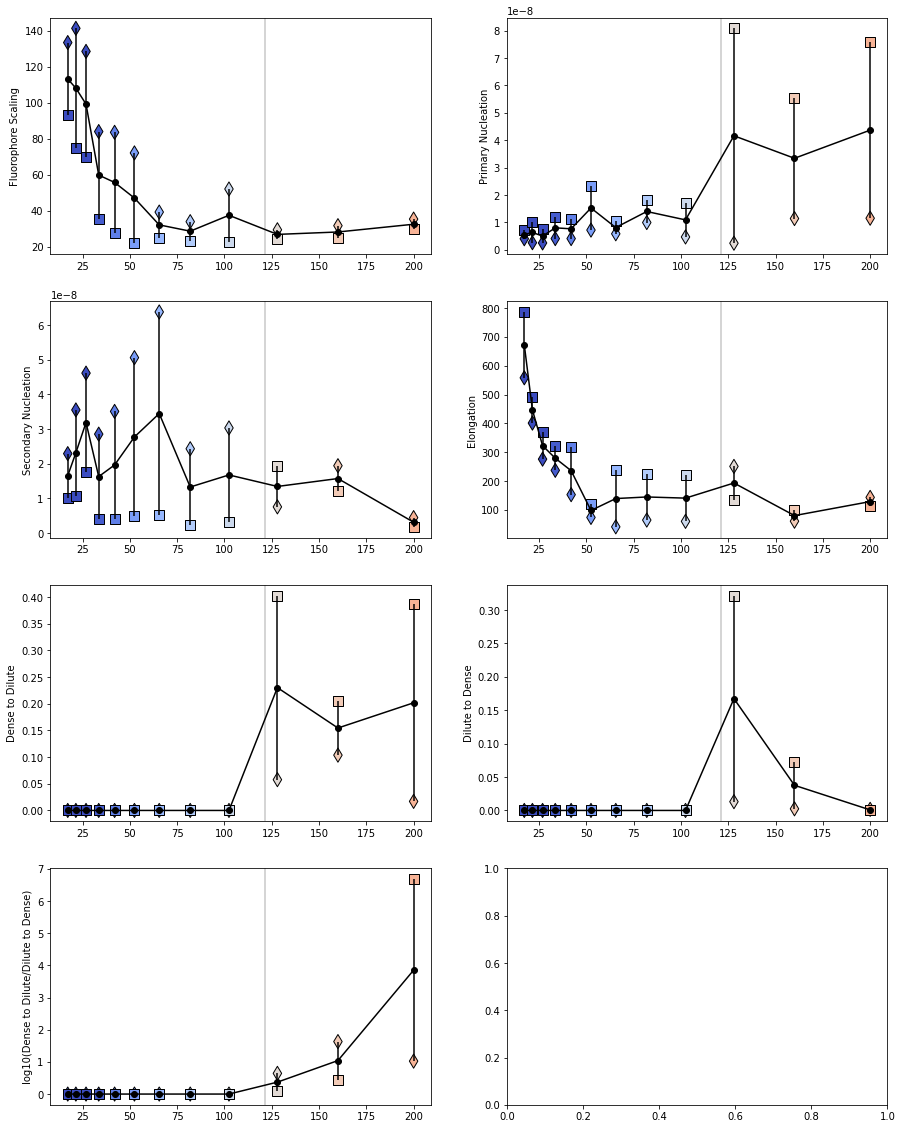

In [26]:
import math

csat_d262n = 121.2


supersatd262n=[]
for c in range(0,len(conc)):
    supersatd262n.append(math.log2(conc[c]/csat_d262n))
    
print(supersatd262n)

dendild262n=np.zeros((len(mydays),len(conc)))
dildend262n=np.zeros((len(mydays),len(conc)))
fib1d262n=np.zeros((len(mydays),len(conc)))
fib2d262n=np.zeros((len(mydays),len(conc)))
fiblongd262n=np.zeros((len(mydays),len(conc)))
fscald262n=np.zeros((len(mydays),len(conc)))
ddratd262n=np.zeros((len(mydays),len(conc)))

mdendild262n=[]
mdildend262n=[]
mfib1d262n=[]
mfib2d262n=[]
mfiblongd262n=[]
mfscald262n=[]
mddratd262n=[]

semdendild262n=[]
semdildend262n=[]
semfib1d262n=[]
semfib2d262n=[]
semfiblongd262n=[]
semfscald262n=[]
semddratd262n=[]


for c in range(0,len(conc2)):
    for d in range(0,len(mydays)):
        with open('best_guess_D262N_'+str(conc2[c])+'_Day_'+mydays[d]+'.txt') as myfile:
            for line in myfile:
                line = line.strip()
                line = line.split(",")
                dendild262n[d,c]=(float(line[0]))
                dildend262n[d,c]=(float(line[1]))
                fib1d262n[d,c]=(float(line[2]))
                fib2d262n[d,c]=(float(line[3]))
                fiblongd262n[d,c]=(float(line[4]))
                fscald262n[d,c]=(float(line[10]))
                if dildend262n[d,c]!=0:
                    ddratd262n[d,c]=(math.log10(dendild262n[d,c]/dildend262n[d,c]))
                else:
                    ddratd262n[d,c]=(math.log10(1))
    
    # Mean values
    mdendild262n.append(np.mean(dendild262n[:,c]))
    mdildend262n.append(np.mean(dildend262n[:,c]))
    mfib1d262n.append(np.mean(fib1d262n[:,c]))
    mfib2d262n.append(np.mean(fib2d262n[:,c]))
    mfiblongd262n.append(np.mean(fiblongd262n[:,c]))
    mfscald262n.append(np.mean(fscald262n[:,c]))
    mddratd262n.append(np.mean(ddratd262n[:,c]))
    
    # SEM values
    semdendild262n.append(stats.sem(dendild262n[:,c]))
    semdildend262n.append(stats.sem(dildend262n[:,c]))
    semfib1d262n.append(stats.sem(fib1d262n[:,c]))
    semfib2d262n.append(stats.sem(fib2d262n[:,c]))
    semfiblongd262n.append(stats.sem(fiblongd262n[:,c]))
    semfscald262n.append(stats.sem(fscald262n[:,c]))
    semddratd262n.append(stats.sem(ddratd262n[:,c]))

print(fib2d262n)
print(mfib2d262n)
print(semfib2d262n)
print(np.array(mfib2d262n)-np.array(semfib2d262n))
print(dendild262n)
print(dildend262n)


msize=100
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
for d in range(0,len(mydays)):
    #axs[0,0].plot(conc,fscald262n,'o',markersize=msize)
    axs[0,0].scatter(conc, fscald262n[d,:], s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[0,0].axvline(x=csat_d262n,color='lightgrey')
    axs[0,0].set_ylabel('Fluorophore Scaling')

    #axs[0,1].plot(conc,fib1d262n,'o',markersize=msize)
    axs[0,1].scatter(conc, fib1d262n[d,:], s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[0,1].axvline(x=csat_d262n,color='lightgrey')
    axs[0,1].set_ylabel('Primary Nucleation')

    #axs[1,0].plot(conc,fib2d262n,'o',markersize=msize)
    axs[1,0].scatter(conc, fib2d262n[d,:], s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[1,0].axvline(x=csat_d262n,color='lightgrey')
    axs[1,0].set_ylabel('Secondary Nucleation')

    #axs[1,1].plot(conc,fiblongd262n,'o',markersize=msize)
    axs[1,1].scatter(conc, fiblongd262n[d,:], s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[1,1].axvline(x=csat_d262n,color='lightgrey')
    axs[1,1].set_ylabel('Elongation')

    #axs[2,0].plot(conc,dendild262n,'o',markersize=msize)
    axs[2,0].scatter(conc, dendild262n[d,:], s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[2,0].axvline(x=csat_d262n,color='lightgrey')
    axs[2,0].set_ylabel('Dense to Dilute')

    #axs[2,1].plot(conc,dildend262n,'o',markersize=msize)
    axs[2,1].scatter(conc, dildend262n[d,:], s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[2,1].axvline(x=csat_d262n,color='lightgrey')
    axs[2,1].set_ylabel('Dilute to Dense')

    #axs[3,0].plot(conc,ddratd262n,'o',markersize=msize)
    axs[3,0].scatter(conc, ddratd262n[d,:], s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[3,0].axvline(x=csat_d262n,color='lightgrey')
    axs[3,0].set_ylabel('log10(Dense to Dilute/Dilute to Dense)')

axs[0,0].errorbar(conc,mfscald262n,semfscald262n,marker='o',color='k')
axs[0,1].errorbar(conc,mfib1d262n,semfib1d262n,marker='o',color='k')
axs[1,0].errorbar(conc,mfib2d262n,semfib2d262n,marker='o',color='k')
axs[1,1].errorbar(conc,mfiblongd262n,semfiblongd262n,marker='o',color='k')
axs[2,0].errorbar(conc,mdendild262n,semdendild262n,marker='o',color='k')
axs[2,1].errorbar(conc,mdildend262n,semdildend262n,marker='o',color='k')
axs[3,0].errorbar(conc,mddratd262n,semddratd262n,marker='o',color='k')

#plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
#plt.rcParams['ps.fonttype'] = 42
#plt.rcParams['font.sans-serif'] = "Arial"
#plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('D262N_Day_2_fitted_parameters_500_max.pdf', transparent=True, bbox_inches = "tight") 


# Connect points

(0.0, 1.7)

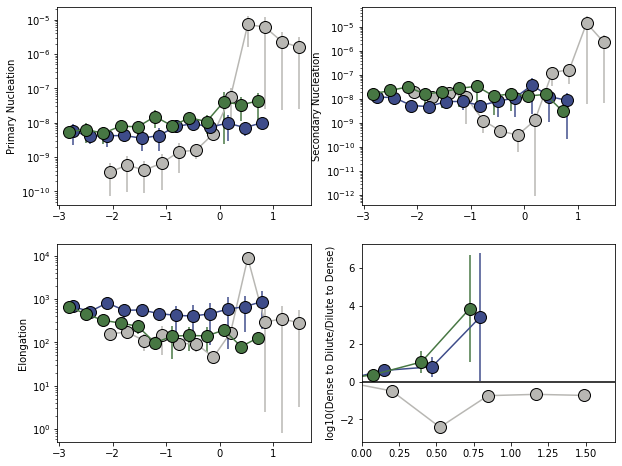

In [27]:
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

semfib1wt_v2=(semfib1wt)
#semfib1wt_v2[semfib1wt>=mfib1wt] = mfib1wt[semfib1wt>=mfib1wt]*.999999
axs[0,0].errorbar(supersatwt, mfib1wt, semfib1wt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[0,0].errorbar(supersatd262v, mfib1d262v, semfib1d262v, marker='o', color='#3e4c8a',markersize=12, markeredgecolor='black')
axs[0,0].errorbar(supersatd262n, mfib1d262n, semfib1d262n, marker='o', color='#477743',markersize=12, markeredgecolor='black')
axs[0,0].set_ylabel('Primary Nucleation')
axs[0,0].set_yscale('log')#,nonpositive='clip')
#axs[0,1].set_ylim([0, 7*10**-9])

semfib2wt_v2=(semfib2wt)
#semfib2wt_v2[semfib2wt>=mfib2wt] = mfib2wt[semfib2wt>=mfib2wt]*.999999
axs[0,1].errorbar(supersatwt, mfib2wt, semfib2wt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[0,1].errorbar(supersatd262v, mfib2d262v, semfib2d262v, marker='o', color='#3e4c8a',markersize=12, markeredgecolor='black')
axs[0,1].errorbar(supersatd262n, mfib2d262n, semfib2d262n, marker='o', color='#477743',markersize=12, markeredgecolor='black')
axs[0,1].set_ylabel('Secondary Nucleation')
axs[0,1].set_yscale('log')#,nonpositive='clip')
#axs[0,1].set_ylim([0, 7*10**-9])

axs[1,0].errorbar(supersatwt, mfiblongwt, semfiblongwt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[1,0].errorbar(supersatd262v, mfiblongd262v, semfiblongd262v, marker='o', color='#3e4c8a',markersize=12, markeredgecolor='black')
axs[1,0].errorbar(supersatd262n, mfiblongd262n, semfiblongd262n, marker='o', color='#477743',markersize=12, markeredgecolor='black')
axs[1,0].set_ylabel('Elongation')
axs[1,0].set_yscale('log')#,nonpositive='clip')
#axs[1,0].set_ylim([0, 7*10**-9])

axs[1,1].errorbar(supersatwt, mddratwt, semddratwt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[1,1].errorbar(supersatd262v, mddratd262v, semddratd262v, marker='o', color='#3e4c8a',markersize=12, markeredgecolor='black')
axs[1,1].errorbar(supersatd262n, mddratd262n, semddratd262n, marker='o', color='#477743',markersize=12, markeredgecolor='black')
axs[1,1].set_ylabel('log10(Dense to Dilute/Dilute to Dense)')
axs[1,1].axhline(y=0,color='black')
axs[1,1].set_xlim([0, 1.7])

#plt.savefig('All_constructs_Day_2_fitted_parameters_by_supersat_single_color.pdf', transparent=True, bbox_inches = "tight") 
#plt.savefig('All_constructs_Day_2_fitted_parameters_by_supersat_single_color_primary_secondary.pdf', transparent=True, bbox_inches = "tight") 


# Plot specific fits

[17, 21, 26, 33, 41, 52, 65, 81, 102, 128, 160, 200]
[-2.0511581900652964, -1.729230095177934, -1.407302000290572, -1.0853739054032097, -0.7634471863777104, -0.44151771562848474, -0.1195896207411224, 0.20233847414623973, 0.5242665690336021, 0.8461946639209645, 1.1681227588083267, 1.4900508536956891]
[-2.7478522677443813, -2.425924172857019, -2.103996077969657, -1.7820679830822943, -1.460141264056795, -1.1382117933075695, -0.8162836984202073, -0.4943556035328448, -0.17242750864548256, 0.14950058624187984, 0.4714286811292421, 0.7933567760166044]
[-2.8185987425718495, -2.4966706476844873, -2.174742552797125, -1.852814457909763, -1.5308877388842634, -1.208958268135038, -0.8870301732476757, -0.5651020783603132, -0.24317398347295088, 0.0787541114144113, 0.4006822063017738, 0.722610301189136]


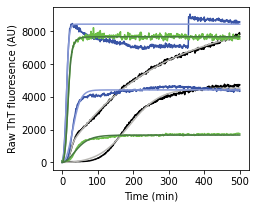

In [11]:
import pandas as pd

# Use similar degrees of supersaturation
datatypebelow=['41_Day_2','65_Day_2','65_Day_2'] #~-0.8
datatypeabove=['128_Day_2','200_Day_2','200_Day_2'] #~0.8
mycolors=['#000000','#3954a5','#6cbd47']
mycolors2=['#b8b7b3','#8798d6','#477743']
construct=['WT','D262V','D262N']

print(conc2)
print(supersatwt)
print(supersatd262v)
print(supersatd262n)

plt.figure(figsize=(3.5,3))

for c in range(0,len(construct)):
    dfexp=pd.read_table('exp_fibril_'+construct[c]+'_'+datatypebelow[c]+'.txt', header=None)
    dfcomp=pd.read_table('comp_fibril_'+construct[c]+'_'+datatypebelow[c]+'.txt', header=None)

    explist=dfexp[0].tolist()
    tmp=dfcomp[0].tolist()
    complist=tmp[0:len(explist)]

    plt.plot(explist,'-',color=mycolors[c])
    plt.plot(complist,'-',color=mycolors2[c])
    
    dfexp=pd.read_table('exp_fibril_'+construct[c]+'_'+datatypeabove[c]+'.txt', header=None)
    dfcomp=pd.read_table('comp_fibril_'+construct[c]+'_'+datatypeabove[c]+'.txt', header=None)

    explist=dfexp[0].tolist()
    tmp=dfcomp[0].tolist()
    complist=tmp[0:len(explist)]

    plt.plot(explist,'-',color=mycolors[c])
    plt.plot(complist,'-',color=mycolors2[c])

#plt.xlim([0, 350])
plt.ylabel('Raw ThT fluoresence (AU)')
plt.xlabel('Time (min)')

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('All_constructs_Day_2_plot_fits_08_500_max_text_files.pdf', transparent=True, bbox_inches = "tight") 


# 4 Panel row of data of fit values for manuscript

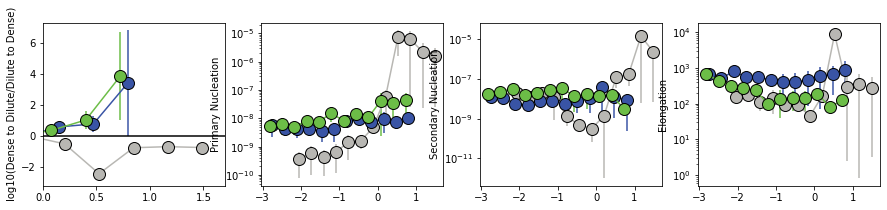

In [28]:
import numpy as np

conc=[17.179869184, 21.47483648, 26.8435456, 33.554432, 41.9430, 52.4288, 65.536, 81.92, 102.4, 128, 160, 200]


fig, axs = plt.subplots(1, 4, figsize=(15, 3))

axs[1].errorbar(supersatwt, mfib1wt, semfib1wt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[1].errorbar(supersatd262v, mfib1d262v, semfib1d262v, marker='o', color='#3954a5',markersize=12, markeredgecolor='black')
axs[1].errorbar(supersatd262n, mfib1d262n, semfib1d262n, marker='o', color='#6cbd47',markersize=12, markeredgecolor='black')
axs[1].set_ylabel('Primary Nucleation')
axs[1].set_yscale('log')#,nonpositive='clip')
#axs[1].set_ylim([0, 7*10**-9])

axs[2].errorbar(supersatwt, mfib2wt, semfib2wt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[2].errorbar(supersatd262v, mfib2d262v, semfib2d262v, marker='o', color='#3954a5',markersize=12, markeredgecolor='black')
axs[2].errorbar(supersatd262n, mfib2d262n, semfib2d262n, marker='o', color='#6cbd47',markersize=12, markeredgecolor='black')
axs[2].set_ylabel('Secondary Nucleation')
axs[2].set_yscale('log')#,nonpositive='clip')
#axs[2].set_ylim([0, 7*10**-9])

axs[3].errorbar(supersatwt, mfiblongwt, semfiblongwt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[3].errorbar(supersatd262v, mfiblongd262v, semfiblongd262v, marker='o', color='#3954a5',markersize=12, markeredgecolor='black')
axs[3].errorbar(supersatd262n, mfiblongd262n, semfiblongd262n, marker='o', color='#6cbd47',markersize=12, markeredgecolor='black')
axs[3].set_ylabel('Elongation')
axs[3].set_yscale('log')#,nonpositive='clip')
#axs[3,0].set_ylim([0, 7*10**-9])

axs[0].errorbar(supersatwt, mddratwt, semddratwt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[0].errorbar(supersatd262v, mddratd262v, semddratd262v, marker='o', color='#3954a5',markersize=12, markeredgecolor='black')
axs[0].errorbar(supersatd262n, mddratd262n, semddratd262n, marker='o', color='#6cbd47',markersize=12, markeredgecolor='black')
axs[0].set_ylabel('log10(Dense to Dilute/Dilute to Dense)')
axs[0].axhline(y=0,color='black')
axs[0].set_xlim([0, 1.7])

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('Mean_all_constructs_Day_2_fitted_parameters_rat_fib1_fib2_elong_500_max_text_files.pdf', transparent=True, bbox_inches = "tight") 


# 4 Panel row of data of fit values for manuscript - with each day

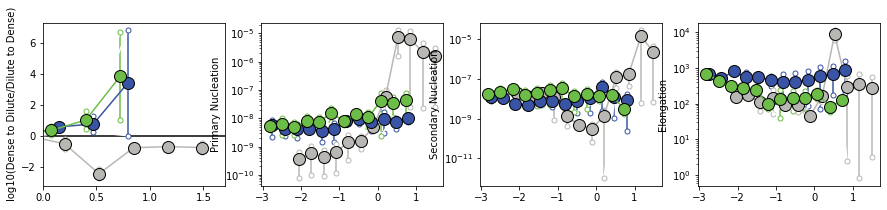

In [29]:
import numpy as np

conc=[17.179869184, 21.47483648, 26.8435456, 33.554432, 41.9430, 52.4288, 65.536, 81.92, 102.4, 128, 160, 200]


fig, axs = plt.subplots(1, 4, figsize=(15, 3))

axs[1].errorbar(supersatwt, mfib1wt, semfib1wt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[1].errorbar(supersatd262v, mfib1d262v, semfib1d262v, marker='o', color='#3954a5',markersize=12, markeredgecolor='black')
axs[1].errorbar(supersatd262n, mfib1d262n, semfib1d262n, marker='o', color='#6cbd47',markersize=12, markeredgecolor='black')
axs[1].set_ylabel('Primary Nucleation')
axs[1].set_yscale('log')#,nonpositive='clip')
#axs[1].set_ylim([0, 7*10**-9])

axs[2].errorbar(supersatwt, mfib2wt, semfib2wt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[2].errorbar(supersatd262v, mfib2d262v, semfib2d262v, marker='o', color='#3954a5',markersize=12, markeredgecolor='black')
axs[2].errorbar(supersatd262n, mfib2d262n, semfib2d262n, marker='o', color='#6cbd47',markersize=12, markeredgecolor='black')
axs[2].set_ylabel('Secondary Nucleation')
axs[2].set_yscale('log')#,nonpositive='clip')
#axs[2].set_ylim([0, 7*10**-9])

axs[3].errorbar(supersatwt, mfiblongwt, semfiblongwt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[3].errorbar(supersatd262v, mfiblongd262v, semfiblongd262v, marker='o', color='#3954a5',markersize=12, markeredgecolor='black')
axs[3].errorbar(supersatd262n, mfiblongd262n, semfiblongd262n, marker='o', color='#6cbd47',markersize=12, markeredgecolor='black')
axs[3].set_ylabel('Elongation')
axs[3].set_yscale('log')#,nonpositive='clip')
#axs[3,0].set_ylim([0, 7*10**-9])

axs[0].errorbar(supersatwt, mddratwt, semddratwt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[0].errorbar(supersatd262v, mddratd262v, semddratd262v, marker='o', color='#3954a5',markersize=12, markeredgecolor='black')
axs[0].errorbar(supersatd262n, mddratd262n, semddratd262n, marker='o', color='#6cbd47',markersize=12, markeredgecolor='black')
axs[0].set_ylabel('log10(Dense to Dilute/Dilute to Dense)')
axs[0].axhline(y=0,color='black')
axs[0].set_xlim([0, 1.7])

currmarker='o'
currmarkersize=5

for d in range(0,len(mydays)):
    axs[0].plot(supersatwt, ddratwt[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#b8b7b3')
    axs[0].plot(supersatd262v, ddratd262v[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#3954a5')
    axs[0].plot(supersatd262n, ddratd262n[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#6cbd47')

    axs[1].plot(supersatwt, fib1wt[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#b8b7b3')
    axs[1].plot(supersatd262v, fib1d262v[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#3954a5')
    axs[1].plot(supersatd262n, fib1d262n[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#6cbd47')

    axs[2].plot(supersatwt, fib2wt[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#b8b7b3')
    axs[2].plot(supersatd262v, fib2d262v[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#3954a5')
    axs[2].plot(supersatd262n, fib2d262n[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#6cbd47')

    axs[3].plot(supersatwt, fiblongwt[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#b8b7b3')
    axs[3].plot(supersatd262v, fiblongd262v[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#3954a5')
    axs[3].plot(supersatd262n, fiblongd262n[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#6cbd47')
    
    
plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('Mean_all_constructs_Day_2_fitted_parameters_rat_fib1_fib2_elong_500_max_text_files.pdf', transparent=True, bbox_inches = "tight") 


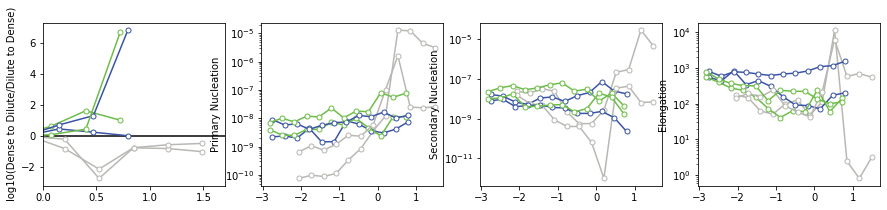

In [31]:
import numpy as np

conc=[17.179869184, 21.47483648, 26.8435456, 33.554432, 41.9430, 52.4288, 65.536, 81.92, 102.4, 128, 160, 200]


fig, axs = plt.subplots(1, 4, figsize=(15, 3))

#axs[1].errorbar(supersatwt, mfib1wt, semfib1wt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
#axs[1].errorbar(supersatd262v, mfib1d262v, semfib1d262v, marker='o', color='#3954a5',markersize=12, markeredgecolor='black')
#axs[1].errorbar(supersatd262n, mfib1d262n, semfib1d262n, marker='o', color='#6cbd47',markersize=12, markeredgecolor='black')
axs[1].set_ylabel('Primary Nucleation')
axs[1].set_yscale('log')#,nonpositive='clip')
#axs[1].set_ylim([0, 7*10**-9])

#axs[2].errorbar(supersatwt, mfib2wt, semfib2wt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
#axs[2].errorbar(supersatd262v, mfib2d262v, semfib2d262v, marker='o', color='#3954a5',markersize=12, markeredgecolor='black')
#axs[2].errorbar(supersatd262n, mfib2d262n, semfib2d262n, marker='o', color='#6cbd47',markersize=12, markeredgecolor='black')
axs[2].set_ylabel('Secondary Nucleation')
axs[2].set_yscale('log')#,nonpositive='clip')
#axs[2].set_ylim([0, 7*10**-9])

#axs[3].errorbar(supersatwt, mfiblongwt, semfiblongwt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
#axs[3].errorbar(supersatd262v, mfiblongd262v, semfiblongd262v, marker='o', color='#3954a5',markersize=12, markeredgecolor='black')
#axs[3].errorbar(supersatd262n, mfiblongd262n, semfiblongd262n, marker='o', color='#6cbd47',markersize=12, markeredgecolor='black')
axs[3].set_ylabel('Elongation')
axs[3].set_yscale('log')#,nonpositive='clip')
#axs[3,0].set_ylim([0, 7*10**-9])

#axs[0].errorbar(supersatwt, mddratwt, semddratwt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
#axs[0].errorbar(supersatd262v, mddratd262v, semddratd262v, marker='o', color='#3954a5',markersize=12, markeredgecolor='black')
#axs[0].errorbar(supersatd262n, mddratd262n, semddratd262n, marker='o', color='#6cbd47',markersize=12, markeredgecolor='black')
axs[0].set_ylabel('log10(Dense to Dilute/Dilute to Dense)')
axs[0].axhline(y=0,color='black')
axs[0].set_xlim([0, 1.7])

currmarker='o'
currmarkersize=5

for d in [0,1]:
    axs[0].plot(supersatwt, ddratwt[d,:], marker=currmarker, color='#b8b7b3',markersize=currmarkersize, markeredgecolor='#b8b7b3',markerfacecolor='white')
    axs[0].plot(supersatd262v, ddratd262v[d,:], marker=currmarker, color='#3954a5',markersize=currmarkersize, markeredgecolor='#3954a5',markerfacecolor='white')
    axs[0].plot(supersatd262n, ddratd262n[d,:], marker=currmarker, color='#6cbd47',markersize=currmarkersize, markeredgecolor='#6cbd47',markerfacecolor='white')

    axs[1].plot(supersatwt, fib1wt[d,:], marker=currmarker, color='#b8b7b3',markersize=currmarkersize, markeredgecolor='#b8b7b3',markerfacecolor='white')
    axs[1].plot(supersatd262v, fib1d262v[d,:], marker=currmarker, color='#3954a5',markersize=currmarkersize, markeredgecolor='#3954a5',markerfacecolor='white')
    axs[1].plot(supersatd262n, fib1d262n[d,:], marker=currmarker, color='#6cbd47',markersize=currmarkersize, markeredgecolor='#6cbd47',markerfacecolor='white')

    axs[2].plot(supersatwt, fib2wt[d,:], marker=currmarker, color='#b8b7b3',markersize=currmarkersize, markeredgecolor='#b8b7b3',markerfacecolor='white')
    axs[2].plot(supersatd262v, fib2d262v[d,:], marker=currmarker, color='#3954a5',markersize=currmarkersize, markeredgecolor='#3954a5',markerfacecolor='white')
    axs[2].plot(supersatd262n, fib2d262n[d,:], marker=currmarker, color='#6cbd47',markersize=currmarkersize, markeredgecolor='#6cbd47',markerfacecolor='white')

    axs[3].plot(supersatwt, fiblongwt[d,:], marker=currmarker, color='#b8b7b3',markersize=currmarkersize, markeredgecolor='#b8b7b3',markerfacecolor='white')
    axs[3].plot(supersatd262v, fiblongd262v[d,:], marker=currmarker, color='#3954a5',markersize=currmarkersize, markeredgecolor='#3954a5',markerfacecolor='white')
    axs[3].plot(supersatd262n, fiblongd262n[d,:], marker=currmarker, color='#6cbd47',markersize=currmarkersize, markeredgecolor='#6cbd47',markerfacecolor='white')
    
    
plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('Mean_all_constructs_Day_2_fitted_parameters_rat_fib1_fib2_elong_500_max_text_files.pdf', transparent=True, bbox_inches = "tight") 


# Plot multiple days together

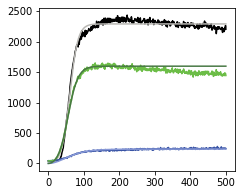

In [12]:
plt.figure(figsize=(3.5,3))

daylist=['1','2','4']
#daylist=['1','4']
currconstruct=['D262N']
currconc=['17']

for d in range(0,len(daylist)):
    dfexp=pd.read_table('exp_fibril_'+currconstruct[0]+'_'+currconc[0]+'_Day_'+daylist[d]+'.txt', header=None)
    dfcomp=pd.read_table('comp_fibril_'+currconstruct[0]+'_'+currconc[0]+'_Day_'+daylist[d]+'.txt', header=None)

    explist=dfexp[0].tolist()
    tmp=dfcomp[0].tolist()
    complist=tmp[0:len(explist)]

    plt.plot(explist,'-',color=mycolors[d])
    plt.plot(complist,'-',color=mycolors2[d])

# Plot multiple concentrations

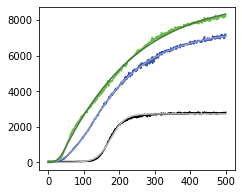

In [68]:
plt.figure(figsize=(3.5,3))

daylist=['1']
currconstruct=['WT']
currconc=['21','81','200']

for d in range(0,len(currconc)):
    dfexp=pd.read_table('exp_fibril_'+currconstruct[0]+'_'+currconc[d]+'_Day_'+daylist[0]+'.txt', header=None)
    dfcomp=pd.read_table('comp_fibril_'+currconstruct[0]+'_'+currconc[d]+'_Day_'+daylist[0]+'.txt', header=None)

    explist=dfexp[0].tolist()
    tmp=dfcomp[0].tolist()
    complist=tmp[0:len(explist)]

    plt.plot(explist,'-',color=mycolors[d])
    plt.plot(complist,'-',color=mycolors2[d])

# 4 panel data plot for manuscript

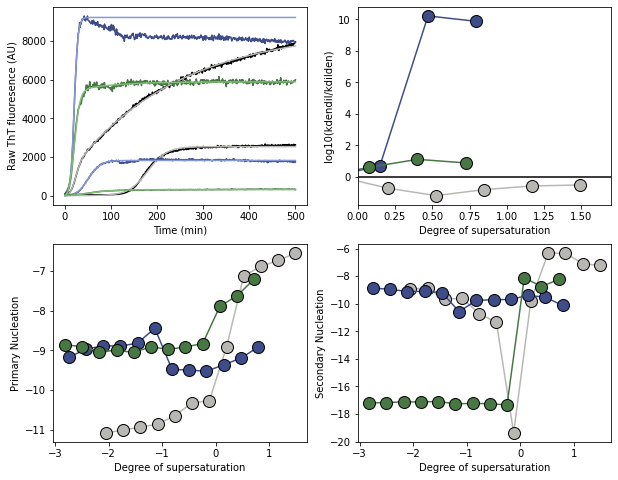

In [9]:
import pandas as pd

conc=[17.179869184, 21.47483648, 26.8435456, 33.554432, 41.9430, 52.4288, 65.536, 81.92, 102.4, 128, 160, 200]


fig, axs = plt.subplots(2, 2, figsize=(10, 8))

datatypebelow=['41_Day_2','65_Day_2','65_Day_2'] #~-0.8
datatypeabove=['128_Day_2','200_Day_2','200_Day_2'] #~0.8
mycolors=['#000000','#3e4c8a','#477743']
mycolors2=['#b8b7b3','#8798d6','#81bc7a']
construct=['WT','D262V','D262N']

for c in range(0,len(construct)):
    dfexp=pd.read_table('exp_fibril_'+construct[c]+'_'+datatypebelow[c]+'.txt', header=None)
    dfcomp=pd.read_table('comp_fibril_'+construct[c]+'_'+datatypebelow[c]+'.txt', header=None)

    explist=dfexp[0].tolist()
    tmp=dfcomp[0].tolist()
    complist=tmp[0:len(explist)]

    axs[0,0].plot(explist,'-',color=mycolors[c])
    axs[0,0].plot(complist,'-',color=mycolors2[c])
    
    dfexp=pd.read_table('exp_fibril_'+construct[c]+'_'+datatypeabove[c]+'.txt', header=None)
    dfcomp=pd.read_table('comp_fibril_'+construct[c]+'_'+datatypeabove[c]+'.txt', header=None)

    explist=dfexp[0].tolist()
    tmp=dfcomp[0].tolist()
    complist=tmp[0:len(explist)]

    axs[0,0].plot(explist,'-',color=mycolors[c])
    axs[0,0].plot(complist,'-',color=mycolors2[c])

axs[0,0].set_ylabel('Raw ThT fluoresence (AU)')
axs[0,0].set_xlabel('Time (min)')
           
axs[0,1].plot(supersatwt, ddratwt, '-o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[0,1].plot(supersatd262v, ddratd262v, '-o', color='#3e4c8a',markersize=12, markeredgecolor='black')
axs[0,1].plot(supersatd262n, ddratd262n, '-o', color='#477743',markersize=12, markeredgecolor='black')
axs[0,1].set_ylabel('log10(kdendil/kdilden)')
axs[0,1].set_xlabel('Degree of supersaturation')
axs[0,1].axhline(y=0,color='black')
axs[0,1].set_xlim([0, 1.7])

axs[1,0].plot(supersatwt, np.log10(fib1wt), '-o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[1,0].plot(supersatd262v, np.log10(fib1d262v), '-o', color='#3e4c8a',markersize=12, markeredgecolor='black')
axs[1,0].plot(supersatd262n, np.log10(fib1d262n), '-o', color='#477743',markersize=12, markeredgecolor='black')
axs[1,0].set_ylabel('Primary Nucleation')
axs[1,0].set_xlabel('Degree of supersaturation')
#axs[1,0].set_ylim([-20, -5])

axs[1,1].plot(supersatwt, np.log10(fib2wt), '-o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[1,1].plot(supersatd262v, np.log10(fib2d262v), '-o', color='#3e4c8a',markersize=12, markeredgecolor='black')
axs[1,1].plot(supersatd262n, np.log10(fib2d262n), '-o', color='#477743',markersize=12, markeredgecolor='black')
axs[1,1].set_ylabel('Secondary Nucleation')
axs[1,1].set_xlabel('Degree of supersaturation')
#axs[1,1].set_ylim([-20, -5])

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('All_constructs_Day_2_fitted_parameters_exp_fits_rat_fib1_fib2_500_max.pdf', transparent=True, bbox_inches = "tight") 
#plt.savefig('All_constructs_Day_2_fitted_parameters_exp_fits_rat_fib1_fib2_prim_equal_sec.pdf', transparent=True, bbox_inches = "tight") 


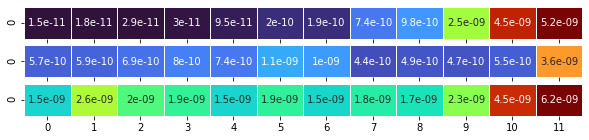

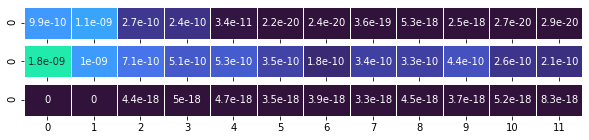

In [29]:
import seaborn as sbn
import numpy as np

f,(ax1,ax2,ax3) = plt.subplots(3,1,sharex=True,figsize = (10, 2))
g1 = sbn.heatmap(np.asarray(fib1wt).reshape(1,len(conc)),cmap='turbo',cbar=False,ax=ax1,vmin=1e-11, vmax=5e-9, square=False, linewidth=.5, annot=True)
g2 = sbn.heatmap(np.asarray(fib1d262v).reshape(1,len(conc)),cmap='turbo',cbar=False,ax=ax2,vmin=1e-11, vmax=5e-9, square=False, linewidth=.5, annot=True)
g3 = sbn.heatmap(np.asarray(fib1d262n).reshape(1,len(conc)),cmap='turbo',cbar=False,ax=ax3,vmin=1e-11, vmax=5e-9, square=False, linewidth=.5, annot=True)


f,(ax1,ax2,ax3) = plt.subplots(3,1,sharex=True,figsize = (10, 2))
g1 = sbn.heatmap(np.asarray(fib2wt).reshape(1,len(conc)),cmap='turbo',cbar=False,ax=ax1,vmin=1e-11, vmax=5e-9, square=False, linewidth=.5, annot=True)
g2 = sbn.heatmap(np.asarray(fib2d262v).reshape(1,len(conc)),cmap='turbo',cbar=False,ax=ax2,vmin=1e-11, vmax=5e-9, square=False, linewidth=.5, annot=True)
g3 = sbn.heatmap(np.asarray(fib2d262n).reshape(1,len(conc)),cmap='turbo',cbar=False,ax=ax3,vmin=1e-11, vmax=5e-9, square=False, linewidth=.5, annot=True)


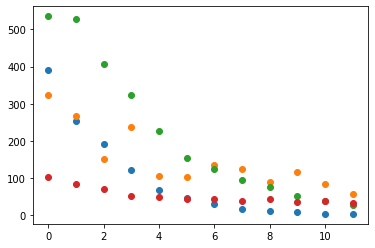

In [13]:
sloped262n2=[390.9, 253.5, 192.8, 121.5, 67.6, 46.7, 30.8, 16.7, 11.0, 8.1, 4.9, 4.2]

sloped262n1=[324.5, 267.4, 151.6, 237.0, 106.2, 102.8, 135.4, 126.0, 90.1, 116.1, 84.3, 57.4]

sloped262v2=[535.3, 527.4, 406.9, 323.3, 226.3, 153.5, 125.9, 95.6, 75.7, 51.8, 39.2, 27.8]

slopewt2=[102.6, 85.9, 71.2, 53.4, 48.6, 44.2, 45.0, 38.1, 43.4, 36.0, 38.2, 33.0]

plt.plot(sloped262n2,'o')
plt.plot(sloped262n1,'o')
plt.plot(sloped262v2,'o')
plt.plot(slopewt2,'o')